In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#Call for Loading The Iris Dataset
iris = load_iris()


In [23]:
#Method For Splitting the data into 10% test and 90% train
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

In [24]:
slen_X_train = X_train[:,0]
swid_X_train = X_train[:,1]
plen_X_train = X_train[:,2]
pwid_X_train = X_train[:,3]
slen_X_test = X_test[:,0]
swid_X_test = X_test[:,1]
plen_X_test = X_test[:,2]
pwid_X_test = X_test[:,3]

In [25]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.errors = []
        self.l2_errors = []

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def gradient_descent(self, X, y, learning_rate, epochs):
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, (n_features,))

        for _ in range(epochs):
            y_pred = np.dot(X, self.weights)
            error = self.mean_squared_error(y, y_pred)
            self.errors.append(error)

            gradient = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            self.weights -= learning_rate * gradient

    def fit(self, X, y, learning_rate=0.01, epochs=100):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.gradient_descent(X, y, learning_rate, epochs)

    def fit_l2(self, X, y, learning_rate=0.01, epochs=100, l2_penalty=1):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, (n_features,))

        for _ in range(epochs):
            y_pred = np.dot(X, self.weights)
            error = self.mean_squared_error(y, y_pred)
            self.l2_errors.append(error)

            gradient = (2 / n_samples) * np.dot(X.T, (y_pred - y)) + (2 * l2_penalty * self.weights)
            self.weights -= learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.weights[None].T)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



In [26]:
sxd1182_model1 = LinearRegression()
X_train_reshaped = np.concatenate((np.ones((slen_X_train.shape[0], 1)), slen_X_train[:, np.newaxis]), axis=1)
sxd1182_model1.fit(X_train_reshaped, swid_X_train, learning_rate=0.01, epochs=100)



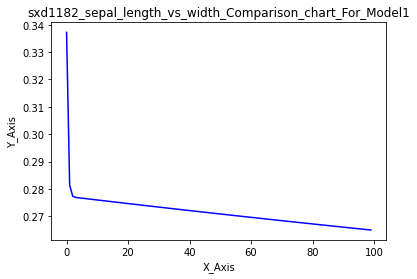

In [27]:
import matplotlib.pyplot as plt

plt.plot(sxd1182_model1.errors, color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model1')
plt.xlabel('X_Axis')
plt.ylabel('Y_Axis')
plt.show()


In [28]:

sxd1182_model1.weights

array([0.72067525, 0.63061461, 0.28621668])

In [29]:
predict1 = sxd1182_model1.predict(np.concatenate((np.ones((slen_X_test.shape[0], 1)), slen_X_test[:, np.newaxis]), axis=1))
sxd1182_model1_accuracy = mean_squared_error(swid_X_test, predict1)
print("Mean Squared Error:", sxd1182_model1_accuracy)
print("Learned Weights:", sxd1182_model1.weights)



Mean Squared Error: 0.2286247524695168
Learned Weights: [0.72067525 0.63061461 0.28621668]


Mean Squared Error with L2 Regularization: 0.3152510920617412
Mean Squared Error 2 : 1.08365379434726
Mean Squared Error 3 : 3.769786745514001
Mean Squared Error 4 : 0.7078946357065619
Mean Squared Error 5 : 5.349632619920416
Mean Squared Error 6 : 3.0268518988707593
Mean Squared Error 7 : 3.2534159317182034
Mean Squared Error 8 : 0.6237105261322659
Mean Squared Error 9 : 0.8590583763379451
Mean Squared Error 10 : 0.61375718525108
Mean Squared Error 11 : 0.7719527948006324
Mean Squared Error 12 : 5.557336113260708


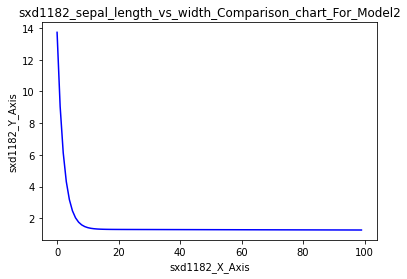

In [30]:
sxd1182_model1 = LinearRegression()
sxd1182_model1.fit_l2(slen_X_train.reshape(-1, 1), swid_X_train, learning_rate=0.01, epochs=100, l2_penalty=0.4)
txt6312_predict1_l2 = sxd1182_model1.predict(slen_X_test.reshape(-1, 1))
sxd1182_model1_l2_accuracy = mean_squared_error(swid_X_test, txt6312_predict1_l2)
print("Mean Squared Error with L2 Regularization:", sxd1182_model1_l2_accuracy)

sxd1182_model2 = LinearRegression()
sxd1182_model2.fit(swid_X_train[:, np.newaxis], slen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict2 = sxd1182_model2.predict(swid_X_test[:, np.newaxis])
sxd1182_model2_accuracy = mean_squared_error(slen_X_test, txt6312_predict2)
print("Mean Squared Error 2 :", sxd1182_model2_accuracy)

sxd1182_model3 = LinearRegression()
sxd1182_model3.fit(slen_X_train[:, np.newaxis], plen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict3 = sxd1182_model3.predict(slen_X_test[:, np.newaxis])
sxd1182_model3_accuracy = mean_squared_error(plen_X_test, txt6312_predict3)
print("Mean Squared Error 3 :", sxd1182_model3_accuracy)

sxd1182_model4 = LinearRegression()
sxd1182_model4.fit(slen_X_train[:, np.newaxis], pwid_X_train, learning_rate=0.01, epochs=100)
txt6312_predict4 = sxd1182_model4.predict(slen_X_test[:, np.newaxis])
sxd1182_model4_accuracy = mean_squared_error(pwid_X_test, txt6312_predict4)
print("Mean Squared Error 4 :", sxd1182_model4_accuracy)

txt6312_model5 = LinearRegression()
txt6312_model5.fit(plen_X_train[:, np.newaxis], slen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict5 = txt6312_model5.predict(plen_X_test[:, np.newaxis])
txt6312_model5_accuracy = mean_squared_error(slen_X_test, txt6312_predict5)
print("Mean Squared Error 5 :", txt6312_model5_accuracy)

txt6312_model6 = LinearRegression()
txt6312_model6.fit(pwid_X_train[:, np.newaxis], slen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict6 = txt6312_model6.predict(pwid_X_test[:, np.newaxis])
txt6312_model6_accuracy = mean_squared_error(slen_X_test, txt6312_predict6)
print("Mean Squared Error 6 :", txt6312_model6_accuracy)

txt6312_model7 = LinearRegression()
txt6312_model7.fit(swid_X_train[:, np.newaxis], plen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict7 = txt6312_model7.predict(swid_X_test[:, np.newaxis])
txt6312_model7_accuracy = mean_squared_error(plen_X_test, txt6312_predict7)
print("Mean Squared Error 7 :", txt6312_model7_accuracy)

txt6312_model8 = LinearRegression()
txt6312_model8.fit(swid_X_train[:, np.newaxis], pwid_X_train, learning_rate=0.01, epochs=100)
txt6312_predict8 = txt6312_model8.predict(swid_X_test[:, np.newaxis])
txt6312_model8_accuracy = mean_squared_error(pwid_X_test, txt6312_predict8)
print("Mean Squared Error 8 :", txt6312_model8_accuracy)

sxd1182_model9 = LinearRegression()
sxd1182_model9.fit(plen_X_train[:, np.newaxis], swid_X_train, learning_rate=0.01, epochs=100)
txt6312_predict9 = sxd1182_model9.predict(plen_X_test[:, np.newaxis])
sxd1182_model9_accuracy = mean_squared_error(swid_X_test, txt6312_predict9)
print("Mean Squared Error 9 :", sxd1182_model9_accuracy)

sxd1182_model10 = LinearRegression()
sxd1182_model10.fit(pwid_X_train[:, np.newaxis], swid_X_train, learning_rate=0.01, epochs=100)
txt6312_predict10 = sxd1182_model10.predict(pwid_X_test[:, np.newaxis])
sxd1182_model10_accuracy = mean_squared_error(swid_X_test, txt6312_predict10)
print("Mean Squared Error 10 :", sxd1182_model10_accuracy)

sxd1182_model11 = LinearRegression()
sxd1182_model11.fit(plen_X_train[:, np.newaxis], pwid_X_train, learning_rate=0.01, epochs=100)
txt6312_predict11 = sxd1182_model11.predict(plen_X_test[:, np.newaxis])
sxd1182_model11_accuracy = mean_squared_error(pwid_X_test, txt6312_predict11)
print("Mean Squared Error 11 :", sxd1182_model11_accuracy)

sxd1182_model12 = LinearRegression()
sxd1182_model12.fit(pwid_X_train[:, np.newaxis], plen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict12 = sxd1182_model12.predict(pwid_X_train[:, np.newaxis])
sxd1182_model12_accuracy = mean_squared_error(plen_X_train, txt6312_predict12)
print("Mean Squared Error 12 :", sxd1182_model12_accuracy)

plt.plot(sxd1182_model2.errors, color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model2')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()


In [31]:
sxd1182_model12 = LinearRegression()
sxd1182_model12.fit(pwid_X_train[:, np.newaxis], plen_X_train, learning_rate=0.01, epochs=100)
txt6312_predict12 = sxd1182_model12.predict(pwid_X_train[:, np.newaxis])
sxd1182_model12_accuracy = mean_squared(plen_X_train, txt6312_predict12)
print("Mean Squared Error 2 :", sxd1182_model12_accuracy)


NameError: name 'mean_squared' is not defined

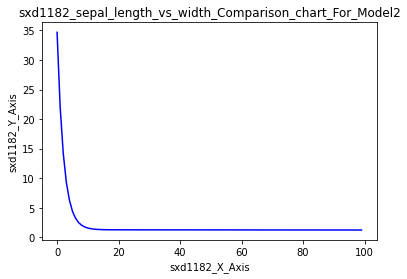

In [ ]:
plt.plot(sxd1182_model2.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model2')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

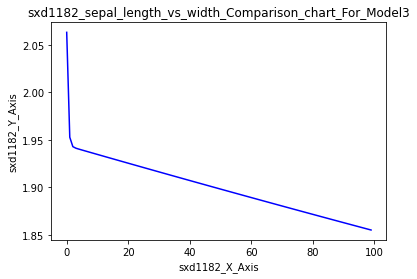

In [ ]:
plt.plot(sxd1182_model3.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model3')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

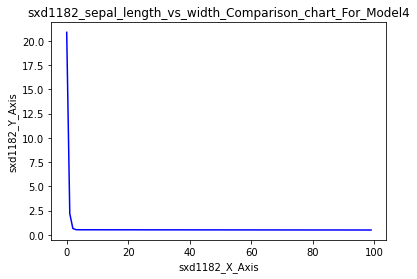

In [ ]:
plt.plot(sxd1182_model4.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model4')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

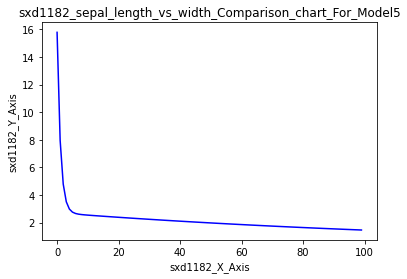

In [ ]:
plt.plot(txt6312_model5.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model5')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

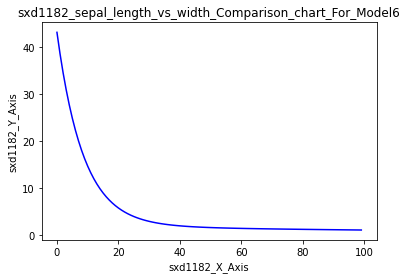

In [ ]:
plt.plot(txt6312_model6.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model6')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

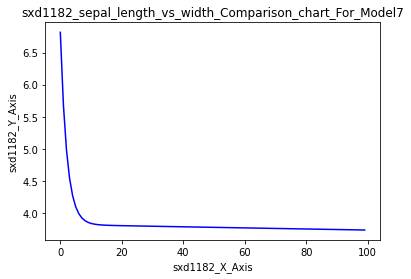

In [ ]:
plt.plot(txt6312_model7.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model7')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

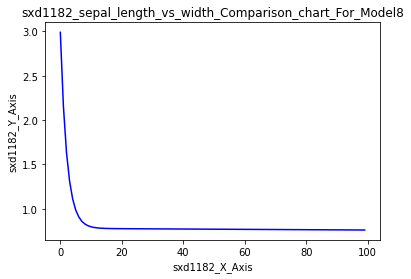

In [ ]:
plt.plot(txt6312_model8.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model8')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

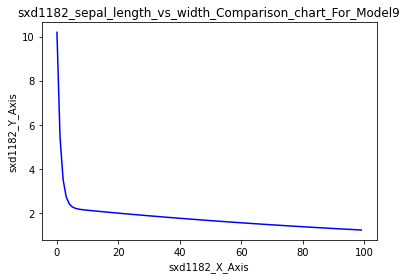

In [ ]:
plt.plot(sxd1182_model9.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model9')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

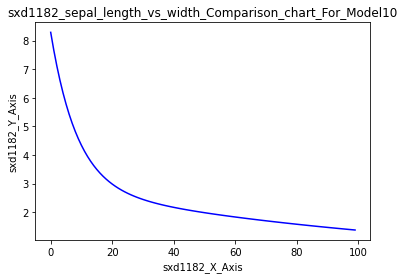

In [ ]:
plt.plot(sxd1182_model10.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model10')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

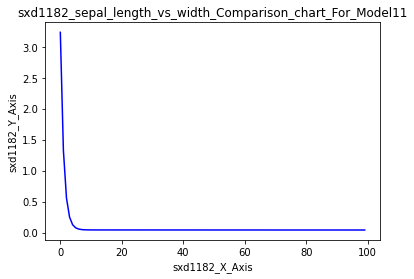

In [ ]:
plt.plot(sxd1182_model11.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model11')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()

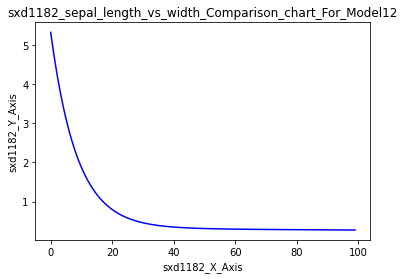

In [ ]:
plt.plot(sxd1182_model12.errors,color='blue')
plt.title('sxd1182_sepal_length_vs_width_Comparison_chart_For_Model12')
plt.xlabel('sxd1182_X_Axis')
plt.ylabel('sxd1182_Y_Axis')
plt.show()